<a href="https://colab.research.google.com/github/carlosgalan01/Reinforcement-Learning/blob/main/My_thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [ ]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

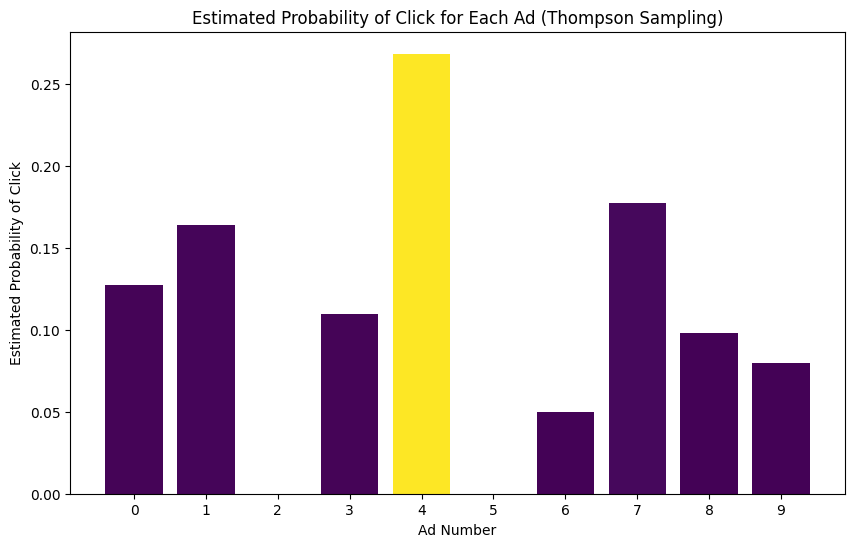

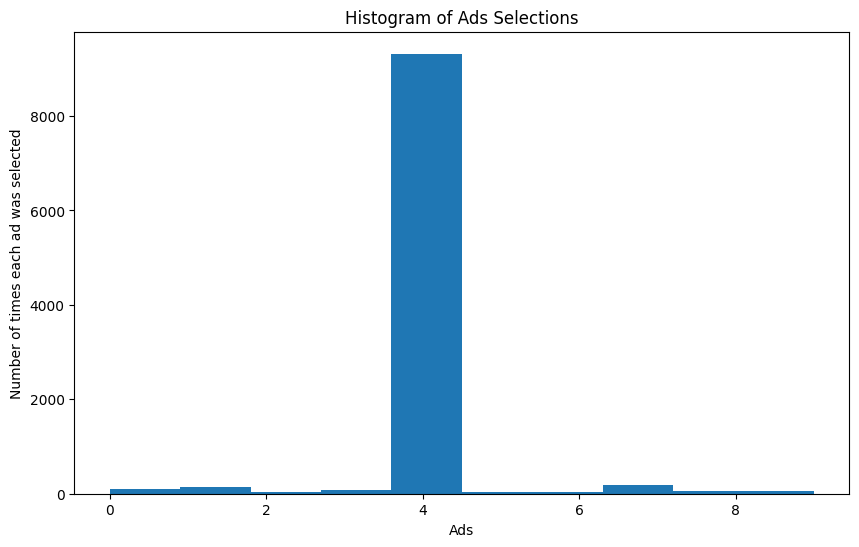

In [ ]:
# prompt: quiero saber cual es la probabilidad estimada de click en cada anuncio y que lo dibujes, y que el color de cada barra esté determinado por una escala de color según las veces que haya sido elegido cada anuncio, siendo rojo el anuncio menos elegido y verde el mas elegido

import pandas as pd
import matplotlib.pyplot as plt
# Calculate estimated probability of click for each ad
estimated_probabilities = [numbers_of_rewards_1[i] / (numbers_of_rewards_1[i] + numbers_of_rewards_0[i]) for i in range(d)]

# Calculate the count of times each ad was selected
ad_counts = pd.Series(ads_selected).value_counts().sort_index()

# Create a color map based on ad counts
min_count = ad_counts.min()
max_count = ad_counts.max()
colors = plt.cm.RdYlGn([(count - min_count) / (max_count - min_count) for count in ad_counts])

# Visualize the estimated probabilities of click for each ad
plt.figure(figsize=(10, 6))
plt.bar(range(d), estimated_probabilities, color=colors)
plt.title('Estimated Probability of Click per Ad')
plt.xlabel('Ad Index')
plt.ylabel('Estimated Probability')
plt.xticks(range(d))
plt.show()

## Visualising the results - Histogram

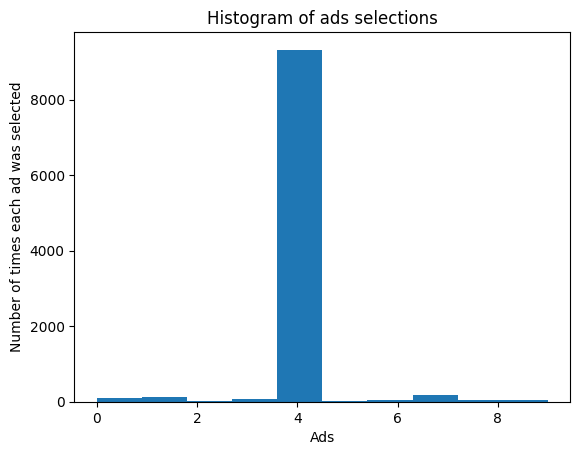

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()